<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statsmodels - это универсальный пакет , который обеспечивает простые методы для получения описательной статистики, обучения  моделей и самое главное их оценки в удобной комплексной форме. Можно сразу получить значения большого количества тестов описывающих обученную модель без применения дополнительного кода. основан на экосистеме SciPy и  поддерживает структуры данных в виде массивов NumPy и чтрутктуры Pandas

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = {
    'Защита': [8, 9, 16, 15, 15, 17, 16, 18],
    'Атака': [20, 20, 25, 40, 35, 30, 29, 27],
    'Побед': [250, 300, 500, 600, 630, 620, 480, 550]
}
df = pd.DataFrame(data)
df

,Защита,Атака,Побед
0,8,20,250
1,9,20,300
2,16,25,500
3,15,40,600
4,15,35,630
5,17,30,620
6,16,29,480
7,18,27,550


In [21]:
df['Результат'] = "мало"
condition = (df['Побед'] > 500)
df.loc[condition, 'Результат'] = "много"
df.head()

,Защита,Атака,Побед,Результат
0,8,20,250,мало
1,9,20,300,мало
2,16,25,500,мало
3,15,40,600,много
4,15,35,630,много


Используем альтернативный способ замены категориальной переменной  численными значениями методом `LabelEncoder`

In [22]:
# целевая переменная  является категориальной
# переведем значения столбца в числа, оставив один столбец
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Результат'] = le.fit_transform(df['Результат'])

df.head()

,Защита,Атака,Побед,Результат
0,8,20,250,0
1,9,20,300,0
2,16,25,500,0
3,15,40,600,1
4,15,35,630,1


В Statsmodels реализован самый лаконичный и в тоже время информативный вывод результатов анализа данных. Линейная регрессия при выводе сообщает большое количество дополнительных оценок.

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

**Dep. Variable** - имя зависимой переменной.

**Model** - вид обученной модели.

**Method** - используемый метод обучения.

**Date, Time** - дата обучения

**No. Observations**- количество наблюдений в выборке (n).

**Df Residuals** - степень свободы (количество наблюдений (n) - количество переменных (k) - 1).

**Df Model** - количество переменных (регрессоров) (k).

**Covariance Type** - по умолчанию используется ковариация, которая неустойчива к гетероскедастичности ошибки. Чтобы воспользоваться устойчивой версией, необходимо использовать  `cov_type=HC0/HC1/HC2/HC3` . Используется для построения матрицы ковариации параметров модели (чтобы её посмотреть, можно вызвать функцию `.cov_params())`. На диагонали матриц будет стоять дисперсия оценок коэффициентов, а числа вне главной диагонали равна их ковариациям . С помощью этой матрицы мы можем сделать вывод о линейной зависимости коэффициентов регрессии друг от друга .



In [24]:
lin_res = ols("Побед ~ Атака + Защита",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Побед   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     34.35
Date:                Tue, 14 Mar 2023   Prob (F-statistic):            0.00120
Time:                        08:35:53   Log-Likelihood:                -39.839
No. Observations:                   8   AIC:                             85.68
Df Residuals:                       5   BIC:                             85.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -129.2066     76.796     -1.682      0.1

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Intercept** - все переменные обнуляются и подбирается константа, наилучшим образом описывающая данные.

**std err** - дисперсия коэффициента по точкам данных. Вычисляется с помощью матрицы ковариаций по параметрам модели:

$$C = cov(\beta) = \sigma^{2} ( X X^{T} )^{-1}$$
где $\sigma^{2}$ — среднеквадратичная ошибка (MSE) остатков. Дисперсия каждого из коэффициентов будет стоять на диагонали данной матрицы.

**t** - статистика t-Стьюдента, чем больше — тем лучше измерен коэффициент (чем меньше стандартное отклонение, тем лучше коэффициент описывает зависимость).  t-критерий позволяет  оценить важность  предикторов, предполагая, что остатки модели нормально распределены около нуля. Если остатки не ведут себя таким образом, то это говорит о наличии некоторой нелинейности между переменными и о том, что их t-тесты не следует использовать для оценки важности отдельных предикторов.

**P>|t|** - например если выбран уровень < 0.05, то гипотеза о значимости коэффициента принимается при более низких значениях.

**Доверительные интервалы коэффициента** - чем меньше доверительный интервал тем больше уверенность в значении оцениваемого коэффициента

**R-squared** - уже известный коэффициент детерминации R² (статистическая мера, представляющая долю дисперсии зависимой переменной, которая объясняется независимой переменной или переменными в модели регрессии. R-квадрат объясняет, в какой степени дисперсия одной переменной объясняет дисперсию второй переменной. Таким образом, если R2 модели составляет 0,50, то примерно половину наблюдаемых изменений можно объяснить входными данными модели) дополнен своей оптимизированной версией Adjusted R-Squared. 

**Adj. R-squared** - скорректированный R-квадрат используют, чтобы сравнить качество регрессионных моделей, содержащих разное количество независимых переменных. При сравнении модели с пятью независимыми переменными и модели с одной переменной, модель с пятью имеет более высокий R-квадрат. Это называется переобучением и может возвращать неоправданно высокое значение R-квадрата. Скорректированный R-квадрат используется для определения того, насколько надежна корреляция и насколько она определяется добавлением независимых переменных. Скорректированный R-квадрат настраивается на количество признаков в модели. Штраф увеличивается при добавлении каждой новой переменной. 

In [25]:
lin_res = ols("Побед ~ Атака + Защита",data=df).fit()
print(lin_res.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.905  
Dependent Variable: Побед            AIC:                85.6776
Date:               2023-03-14 08:35 BIC:                85.9159
No. Observations:   8                Log-Likelihood:     -39.839
Df Model:           2                F-statistic:        34.35  
Df Residuals:       5                Prob (F-statistic): 0.00120
R-squared:          0.932            Scale:              1981.9 
----------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|    [0.025   0.975]
----------------------------------------------------------------
Intercept    -129.2066  76.7961 -1.6825 0.1533 -326.6173 68.2041
Атака          10.4999   2.9936  3.5074 0.0171    2.8045 18.1953
Защита         22.7253   5.6110  4.0501 0.0098    8.3016 37.1489
----------------------------------------------------------------
Omnibus:               0.087       Durbin-

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "




R-квадрат, в отличие от скорректированного R-квадрата, используется для указания того, насколько хорошо регрессионная модель предсказывает ответы для новых наблюдений.
Одно из ошибочных представлений о регрессионном анализе состоит в том, что низкое значение R-квадрата — это всегда плохо.

**F-statistic** критерий Фишера можно использовать для определения общей значимости нескольких независимых переменных. Он используется для сравнения способности  моделей объяснять дисперсию зависимой переменной. Если нет взаимосвязи между откликом и предикторами, F-статистика принимает значение, близкое к 1, иначе число больше. 
 Значение F представляет собой отношение суммы квадратов средней регрессии к сумме квадратов средней ошибки. Его значение будет варьироваться от нуля до сколь угодно большого числа.



**Prob (F-statistic)** — это вероятность того, что нулевая гипотеза для полной модели верна (т. е. что все коэффициенты регрессии равны нулю). Например, если Prob(F) имеет значение 0,01, то есть 1 шанс из 100, что все параметры регрессии равны нулю. Значение будет означать, что по крайней мере некоторые из параметров регрессии отличны от нуля и что уравнение регрессии имеет некоторую достоверность при подгонке данных (т. е. независимые переменные не являются чисто случайными по отношению к зависимой переменной).


**Durbin-Watson Statistic** «Тест Дарбина-Ватсона на автокорреляцию»–  показывает вероятность того, что значения отклонения (ошибки) для регрессии имеют компонент авторегрессии первого порядка. В моделях регрессии предполагается, что отклонения ошибок некоррелированы.
Небольшие значения статистики Дарбина-Ватсона указывают на наличие автокорреляции. 

**Omnibus** описывает нормальность распределения наших остатков (остатки необъяснённой дисперсии), используя в качестве измерений перекос (skew) (коэффициент симметрии распределения) и эксцесс (kurtosis) (мера остроты случайной величины в горбу). 0 означает полную нормальность.

**Prob (Omnibus)** - это статистический тест, измеряющий вероятность нормального распределения остатков. Значение 1 означает совершенно нормальное распределение.

**Skew** (Перекос) - это мера симметрии распределения остатков, где 0 означает идеальную симметрию.

**Kurtosis** (Эксцесс) - измеряет остроту распределения остатков  или его концентрацию около 0 на нормальной кривой. Более высокий эксцесс означает меньшее количество выбросов.

**Jarque-Bera (JB)** проверка нормальности распределения остатков по критерию Харке-Бера и его расчетный уровень значимости **Prob(JB)**.  Критерий Харке-Бера является асимптотическим, расчетное значение имеет распределение хи-квадрат, поэтому данный критерий рекомендуют применять только для больших выборок 

**Cond. No** Число обусловленности используется для проверки мультиколлинеарности (считается, что мультиколлинеарность вероятна, если значение Cond. No > 30) 

Мы можем попробовать ввести интегральный коэффициент и вместо двух переменных создать одну в виде произведения Защиты и Атаки и получим незначительные улучшения по отдельным тестам.

In [26]:
df = df.assign(F = df.Атака * df.Защита)
df

,Защита,Атака,Побед,Результат,F
0,8,20,250,0,160
1,9,20,300,0,180
2,16,25,500,0,400
3,15,40,600,1,600
4,15,35,630,1,525
5,17,30,620,1,510
6,16,29,480,0,464
7,18,27,550,1,486


In [27]:
lin_res = ols("Побед ~ F",data=df).fit()
print(lin_res.summary())

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  Побед   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     76.54
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           0.000123
Time:                        08:35:53   Log-Likelihood:                -40.116
No. Observations:                   8   AIC:                             84.23
Df Residuals:                       6   BIC:                             84.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.9104     43.470      3.081      0.0

Можно рассмотреть и более сложные модели, когда учитывается синергетический эффект.

In [28]:
lin_res = ols("Побед ~ Атака + Защита*Атака",data=df).fit()
print(lin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Побед   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     18.64
Date:                Tue, 14 Mar 2023   Prob (F-statistic):            0.00817
Time:                        08:35:53   Log-Likelihood:                -39.775
No. Observations:                   8   AIC:                             87.55
Df Residuals:                       4   BIC:                             87.87
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      164.8898   1165.411      0.141   

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Log-Likelihood** или логарифмическое значение правдоподобия регрессионной модели — это другой способ измерить продуктивность модели. Чем выше значение логарифмической вероятности, тем лучше модель соответствует набору данных. Значение логарифмического правдоподобия для данной модели может варьироваться от отрицательной бесконечности до положительной бесконечности. Фактическое значение логарифмического правдоподобия для данной модели в большинстве случаев не имеет смысла, но оно полезно для сравнения двух или более моделей. Можно заметить, что в более сложной модели произошло незначительное улучшение этой оценки.


Качество статистических методов из теории информации может быть измерено информационными критериями (IC). Таким образом, это относится к методам выбора модели, основанным на функциях правдоподобия. Самый низкий балл получает лучшая модель. 

**AIC** (информационный критерий Акаике) предназначен для поиска модели, которая объясняет наибольшую изменчивость данных, и штрафует модели, использующие чрезмерное количество параметров. В нашем случае более простая модель имеет меньший, а значит лучший показатель AIC. 


**BIC** (байесовский информационный критерий) из байесовской вероятности чувствителен к размеру выборки, добавляет больший штраф, более прост. В нашем примере согласно ему необходимо предпочесть первую модель.


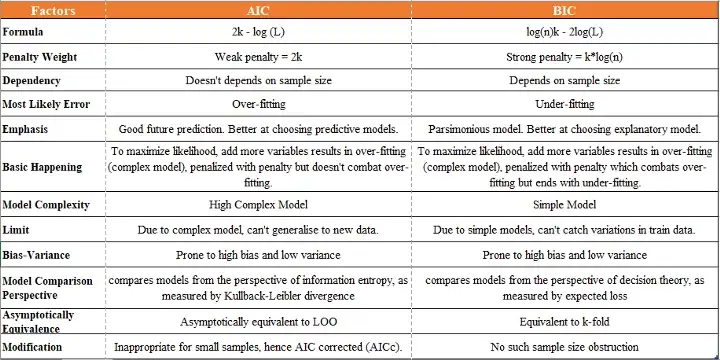

Statsmodels представляет возможность просто создавать специализированные графики отражающие различные аспекты статистического анализа.

eval_env: 1


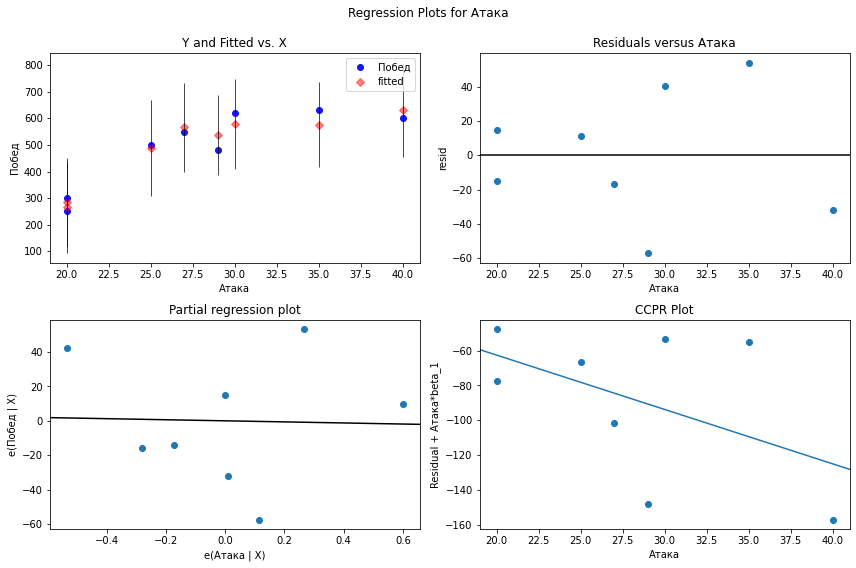

In [29]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lin_res, "Атака", fig=fig)

**Y and Fitted vs.X** отражает фактические и расчетные значения Y с доверительным интервалом для каждого значения Y

**график остатков Residuals versus Атака** - ошибки и остатки тесно связанные и легко путаемые меры отклонения наблюдаемого значения экземпляра  выборки от его «истинного значения». Ошибка наблюдения — это отклонение наблюдаемого значения от истинного значения интересующей величины (например, среднего значения генеральной совокупности). Остаток — это разница между наблюдаемым значением и оценочным значением интересующей величины. 

**график Partial regression plot** - график частичной регрессии, пытается показать эффект добавления другой переменной в модель, которая уже имеет одну или несколько независимых переменных 


**график CCPR Plot (Component-Component plus Residual Plot**) - еще один способ оценить влияние одной независимой переменной на переменную отклика, принимая во внимание влияние других независимых переменны

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


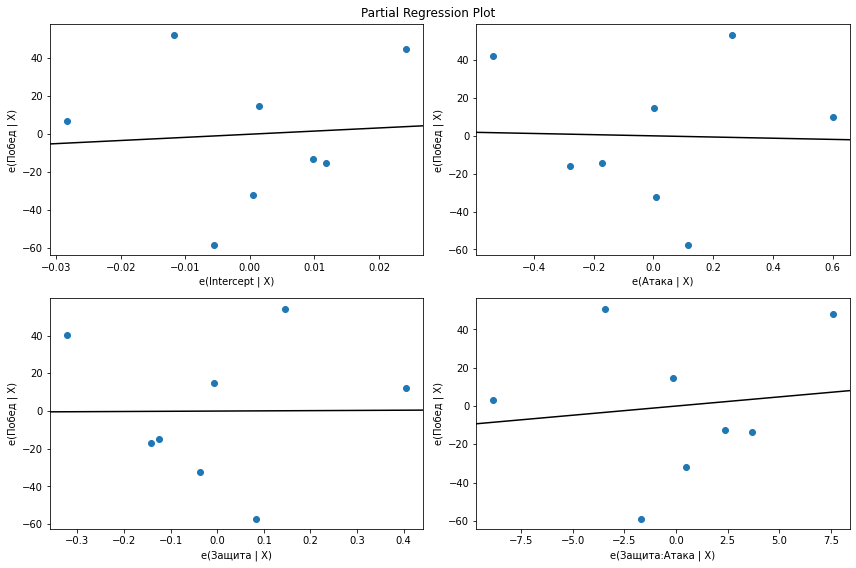

In [30]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lin_res, fig=fig)

**Дисперсионный анализ регрессионной модели (ДАРМ)**



При ДАРМ общую вариацию результативного признака  принято разделять на две составляющие - вариация, обусловленная регрессией и вариация, обусловленная отклонениями от регрессии (остаток), при этом в разных источниках эти термины могут именоваться и обозначаться по-разному, например:

Вариация, обусловленная регрессией - может называться Explained sum of squares (ESS), Sum of Squared Regression (SSR), Sum of squared deviations (SSD).

Вариация, обусловленная отклонениями от регрессии (остаток) - может называться Residual sum of squares (RSS), Sum of squared residuals (SSR), Squared estimate of errors, Sum of Squared Error (SSE)  также применяется термин остаточная дисперсия.

Общая (полная) вариация - может называться Total sum of squares (TSS), Sum of Squared Total (SST) 

In [31]:
print('Anova test: тип 3')
display(sm.stats.anova_lm(lin_res, typ=3))

Anova test: тип 3


,sum_sq,df,F,PR(>F)
Intercept,48.812600,1.0,0.020018,0.894325
Атака,8.185034,1.0,0.003357,0.956577
Защита,0.432343,1.0,0.000177,0.990014
Защита:Атака,156.117027,1.0,0.064025,0.812716
Residual,9753.542655,4.0,NaN,NaN


**Нормальность остатков**

Jarque-Bera test

In [35]:
import statsmodels.stats.api as sms
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(lin_res.resid)
pd.DataFrame(zip(name, test))

,0,1
0,Jarque-Bera,0.358833
1,Chi^2 two-tail prob.,0.835758
2,Skew,0.004141
3,Kurtosis,1.962489


Omni test

In [36]:
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(lin_res.resid)
pd.DataFrame(zip(name, test))

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,0,1
0,Chi^2,0.190089
1,Two-tail probability,0.909332


 **Доверительные интервалы регрессионной модели**

**Dep Var Population** - фактические значения переменной 

**Predicted Value** - предсказанные значения переменной  по по регрессионной модели;

**Std Error Mean Predict** - среднеквадратическая ошибка предсказанного среднего

**Mean ci 95% low и Mean ci 95% upp** - границы доверительного интервала средних значений переменной 

**Predict ci 95% low и Predict ci 95% upp** - границы доверительного интервала индивидуальных значений переменной Y;

**Residual** - остатки регрессионной модели;

**Std Error Residual** - среднеквадратическая ошибка остатков;

**Student Residual** - стьюдентизированные остатки 

**Cook's D** - Расстояние Кука (Cook's distance) - оценивает эффект от удаления одного (рассматриваемого) наблюдения; наблюдение считается выбросом, если Di > 4/n 

In [37]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(lin_res, alpha=0.05)
print(st)

       Obs    Dep Var  Predicted    Std Error    Mean ci    Mean ci Predict ci Predict ci   Residual  Std Error    Student     Cook's
           Population      Value Mean Predict    95% low    95% upp    95% low    95% upp              Residual   Residual          D
-------------------------------------------------------------------------------------------------------------------------------------
         1    250.000    264.867       37.482    160.801    368.933     92.744    436.990    -14.867     32.148     -0.462      0.073
         2    300.000    285.179       32.834    194.018    376.340    120.537    449.821     14.821     36.883      0.402      0.032
         3    500.000    488.424       42.402    370.697    606.150    307.713    669.134     11.576     25.307      0.457      0.147
         4    600.000    632.125       40.490    519.706    744.544    454.826    809.423    -32.125     28.265     -1.137      0.663
         5    630.000    575.856       29.633    493.581    65

В statsmodels можно получать не только линейные модели, но и логистическую регрессию так же просто с подобными же харарактеристиками.

Полезным критерием пригодности, основанным на отклонениях, является **Pseudo R-squ** (псевдо-R-квадрат). Псевдо R-квадрат является аналогом R-квадрата для линейной регрессии. Это показатель того, насколько отклонение «объясняется» моделью. 

In [38]:
from statsmodels.formula.api import logit

In [39]:
log_res = logit("Результат ~  Атака", df).fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.314456
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Результат   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.5463
Time:                        08:37:16   Log-Likelihood:                -2.5156
converged:                       True   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                   0.01384
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.7514     12.687     -1.242      0.214     -40.617       9.114
Атака          0.5664      0.

Возможно вычислять различные дифференциалы -  Marginal effects (эффект прироста определенного показателя, возникающий в результате  прироста какой-либо другой переменной)

В простой линейной модели, например, y = β0 + β1атака + β2защита, мы можем легко
интерпретировать коэффициенты
Это менее просто, когда есть более сложные зависимости, например:
y = β0 + β1защита_1 + β2защита_2 + β3атака Отсутствует единый эффект защиты, а есть зависимость от  уровня защиты.
Использование аналитической производной значительно упрощает интерпретацию:
$$\frac{∂E[y(атака,защита)]}{∂защита}  = β1 + 2β2защита$$


In [40]:
mfx = log_res.get_margeff( method= 'eydx')
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:              Результат
Method:                          eydx
At:                           overall
            d(lny)/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Атака          0.2832      0.236      1.200      0.230      -0.179       0.746


Описательная статистика исходных данных средствами библиотеки statsmodels представляет  более развернутый вариант статистик, с большим количеством тестов проигрывая Pandas в наглядности, выигрывает в информативности

In [41]:
from statsmodels.stats.descriptivestats import Description
result = Description(
    df,
    stats=["nobs", "missing", "mean", "std_err", "ci", "ci", "std", "iqr", "mad", "coef_var", "range", "max", "min", "skew", "kurtosis", "mode",
           "median", "percentiles", "distinct", "top", "freq"],
    alpha=0.05,
    use_t=True)
print(result.summary())

             Descriptive Statistics             
nobs            8      8       8       8       8
missing         0      0       0       0       0
mean        14.25  28.25   491.2     0.5   415.6
std_err     1.306  2.448   51.08   0.189   57.21
upper_ci    17.34  34.04     612  0.9469   550.9
lower_ci    11.16  22.46   370.5 0.05313   280.4
std         3.694  6.923   144.5  0.5345   161.8
iqr          2.75    7.5     170       1   168.8
mad         2.875   5.25   110.9     0.5   126.7
coef_var   0.2592 0.2451  0.2941   1.069  0.3893
range          10     20     380       1     440
max            18     40     630       1     600
min             8     20     250       0     160
skew      -0.9206 0.3573 -0.7468       0 -0.7539
kurtosis    2.245   2.17    2.07       1   2.087
mode           15     20     250       0     160
mode_freq    0.25   0.25   0.125     0.5   0.125
median       15.5     28     525     0.5     475
1%           8.07     20   253.5       0   161.4
5%           8.35   

# Задание

- На выбранном наборе данных изменяя эффект от взаимодействия параметров подобрать лучший вариант модели.
- Интерпретировать получаемые истории в кратком рассказе